In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [2]:
## Load the DataSet


df= pd.read_csv("Copy of bankruptcy-prevention.csv",sep=';')
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
### Clean the column Names

df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [4]:
### Preview DataSet


print("🔹 First 5 rows:")
print(df.head())

🔹 First 5 rows:
   industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk       class  
0              0.0             0.5  bankruptcy  
1              0.0             1.0  bankruptcy  
2              0.0             1.0  bankruptcy  
3              0.0             1.0  bankruptcy  
4              0.0             1.0  bankruptcy  


In [5]:
print("\n🔹 Column Names:")
print(df.columns.tolist())


🔹 Column Names:
['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk', 'class']


In [6]:
print("\n🔹 Dataset Info:")
print(df.info())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB
None


In [7]:
print("\n🔹 Dataset Description:")
print(df.describe())


🔹 Dataset Description:
       industrial_risk  management_risk  financial_flexibility  credibility  \
count       250.000000       250.000000             250.000000   250.000000   
mean          0.518000         0.614000               0.376000     0.470000   
std           0.411526         0.410705               0.401583     0.415682   
min           0.000000         0.000000               0.000000     0.000000   
25%           0.000000         0.500000               0.000000     0.000000   
50%           0.500000         0.500000               0.500000     0.500000   
75%           1.000000         1.000000               0.500000     1.000000   
max           1.000000         1.000000               1.000000     1.000000   

       competitiveness  operating_risk  
count       250.000000      250.000000  
mean          0.476000        0.570000  
std           0.440682        0.434575  
min           0.000000        0.000000  
25%           0.000000        0.000000  
50%           0.50

In [8]:
### Checking Missing Values


print("\n🔹 Missing Values:")
print(df.isnull().sum())


🔹 Missing Values:
industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64


In [9]:
### variable Distribution


print("\n🔹 Class Distribution:")
print(df['class'].value_counts(normalize=True))



🔹 Class Distribution:
class
non-bankruptcy    0.572
bankruptcy        0.428
Name: proportion, dtype: float64


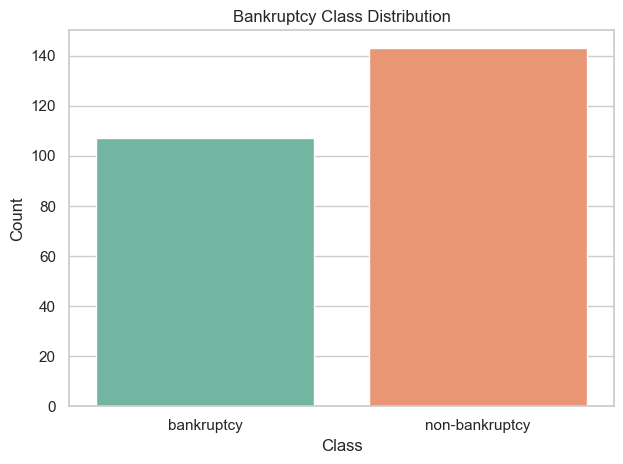

In [10]:
#### Plot target variable without future warning


sns.countplot(x='class', data=df, hue='class', palette='Set2', legend=False)
plt.title('Bankruptcy Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [11]:
#### Feature Distribution


features = ['industrial_risk', 'management_risk', 'financial_flexibility', 
            'credibility', 'competitiveness', 'operating_risk']
features

['industrial_risk',
 'management_risk',
 'financial_flexibility',
 'credibility',
 'competitiveness',
 'operating_risk']

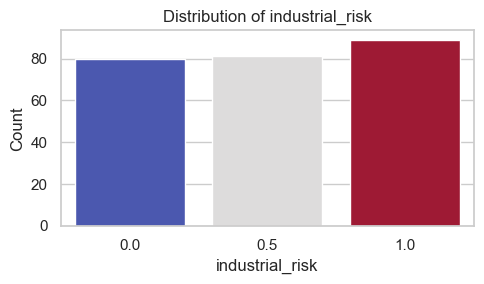

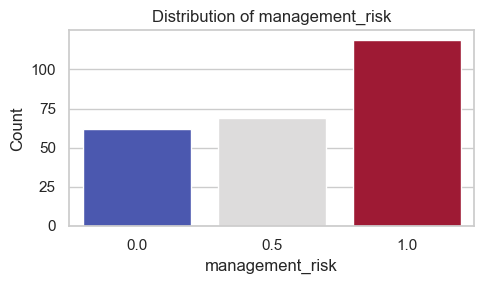

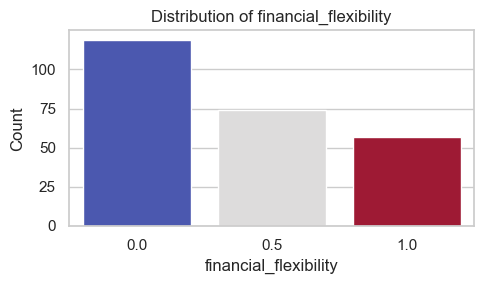

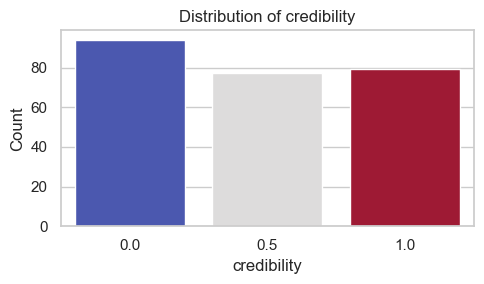

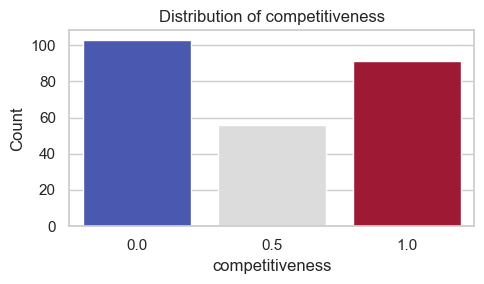

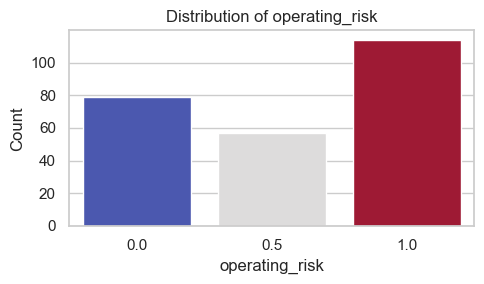

In [12]:
### Feature Distributions (with FutureWarning fix)
for col in features:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=df, hue=col, palette='coolwarm', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


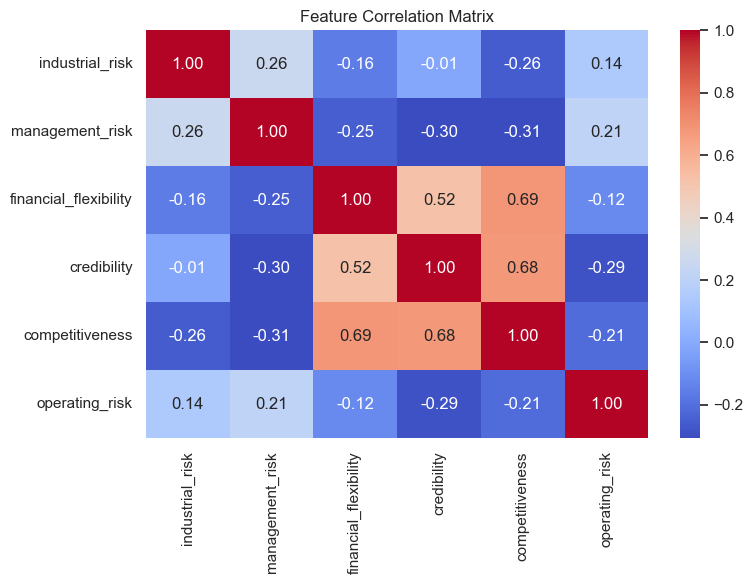

In [13]:
#####   Correlation Heatmap


plt.figure(figsize=(8, 6))
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


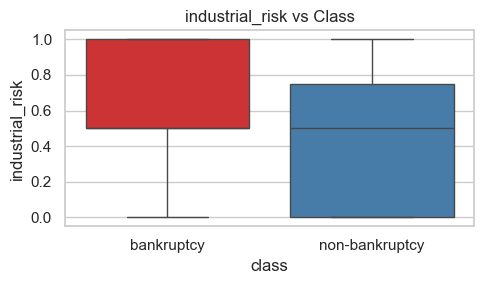

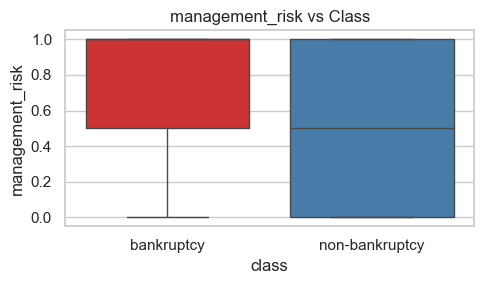

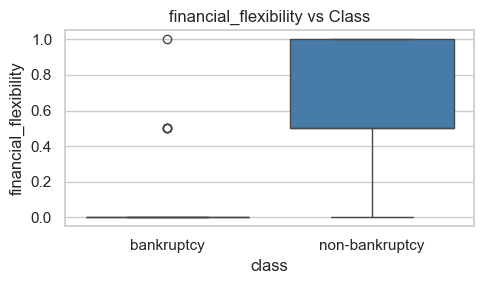

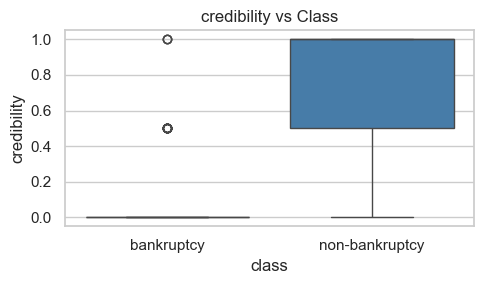

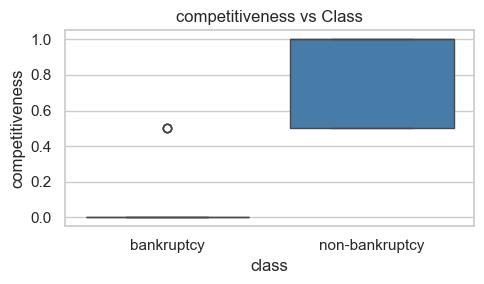

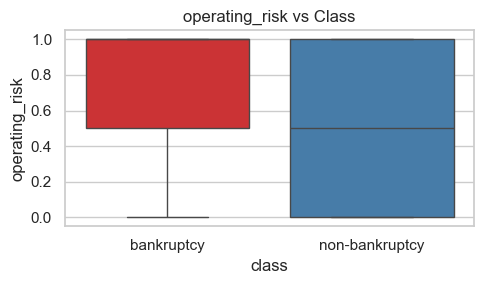

In [14]:
## Feature vs Target Analysis (with FutureWarning fix)
for col in features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='class', y=col, data=df, hue='class', palette='Set1', legend=False)
    plt.title(f'{col} vs Class')
    plt.tight_layout()
    plt.show()

In [15]:
#########  Model Building  &  Model Evaluation  ############

In [16]:
##############    MUlti liner Regression         ##############

In [17]:
# Convert 'class' to numeric: bankruptcy → 1, non-bankruptcy → 0    >>>> Encode target column to Numeric

df['class'] = df['class'].map({'bankruptcy': 1, 'non-bankruptcy': 0})

In [18]:
print("\nFinal Processed Data:\n", df.head())


Final Processed Data:
    industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk  class  
0              0.0             0.5      1  
1              0.0             1.0      1  
2              0.0             1.0      1  
3              0.0             1.0      1  
4              0.0             1.0      1  


In [19]:
##### Important Libraries For Multi Liner Regression


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
##### Encode Categorical Feature

# Convert any categorical features to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)


In [21]:
##### split features  & target


X = df_encoded.drop('class', axis=1)  # Features
y = df_encoded['class']               # Target


In [22]:
###### Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


####### Define and trained the model 
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [23]:
###### Model is Defined & Trained

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
#########   After  training the model 


print('Intercept:', model.intercept_[0])
print('Coefficients:')
for col, coef in zip(X.columns, model.coef_[0]):
    print(f"{col}: {coef}")

Intercept: 2.0030449982910943
Coefficients:
industrial_risk: 0.5017503476558206
management_risk: 0.7992129265554072
financial_flexibility: -2.289737565668308
credibility: -2.3994859838730767
competitiveness: -3.748629031097391
operating_risk: 0.4677292896671054


In [25]:
y_pred = regressor.predict(X_test)

In [26]:
##### Mean squared Error 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Mean Squared Error: 0.033501433492738854
R² Score: 0.8624735899312854


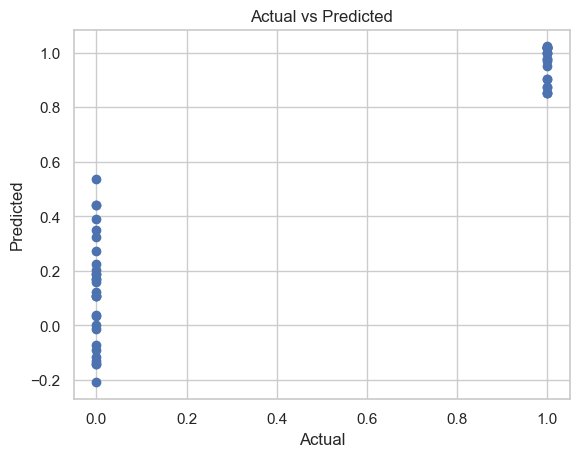

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [28]:
###### using Logistic  Regression  #######



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_curve,
    roc_auc_score
)

In [29]:
print("\nTarget class distribution:")
print(df['class'].value_counts())


Target class distribution:
class
0    143
1    107
Name: count, dtype: int64


In [30]:
X = df.drop('class', axis=1)
y = df['class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (200, 6)
Test set size: (50, 6)


In [33]:
##### Model Defined & Trained

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
print("\nIntercept:", model.intercept_[0])
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Intercept: 1.9111090748443278
Coefficients:
industrial_risk: 0.5597
management_risk: 0.8956
financial_flexibility: -2.2744
credibility: -2.3074
competitiveness: -3.7680
operating_risk: 0.3103


In [35]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [36]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[29  0]
 [ 0 21]]


In [37]:
###### Predict & Evluation Report


from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [38]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 100.00%


In [39]:
###### Confusion Matrix Heatmap 

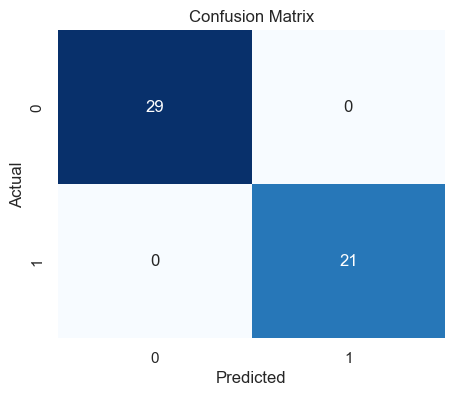

In [40]:
# 11️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
auc = roc_auc_score(y_test, y_prob)

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

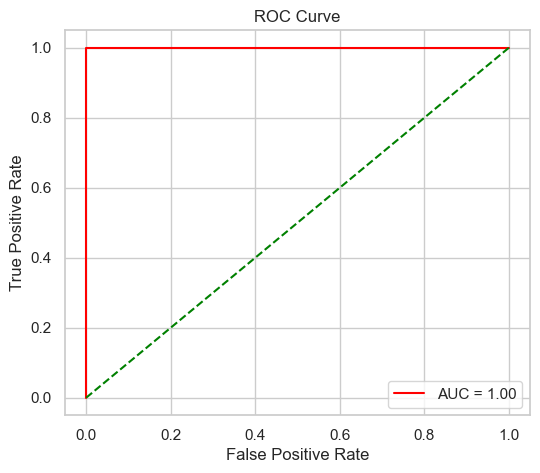

In [43]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='Red')
plt.plot([0, 1], [0, 1], linestyle='--', color='Green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [44]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[29  0]
 [ 0 21]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Accuracy: 1.0


In [45]:
#>#>#>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#>>#

In [46]:
  ########   Decision Tree    #########

In [47]:
####### We Had Already Split the Data So We Can Directly Go For Decision Tree
print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (200, 6)
Test set size: (50, 6)


In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

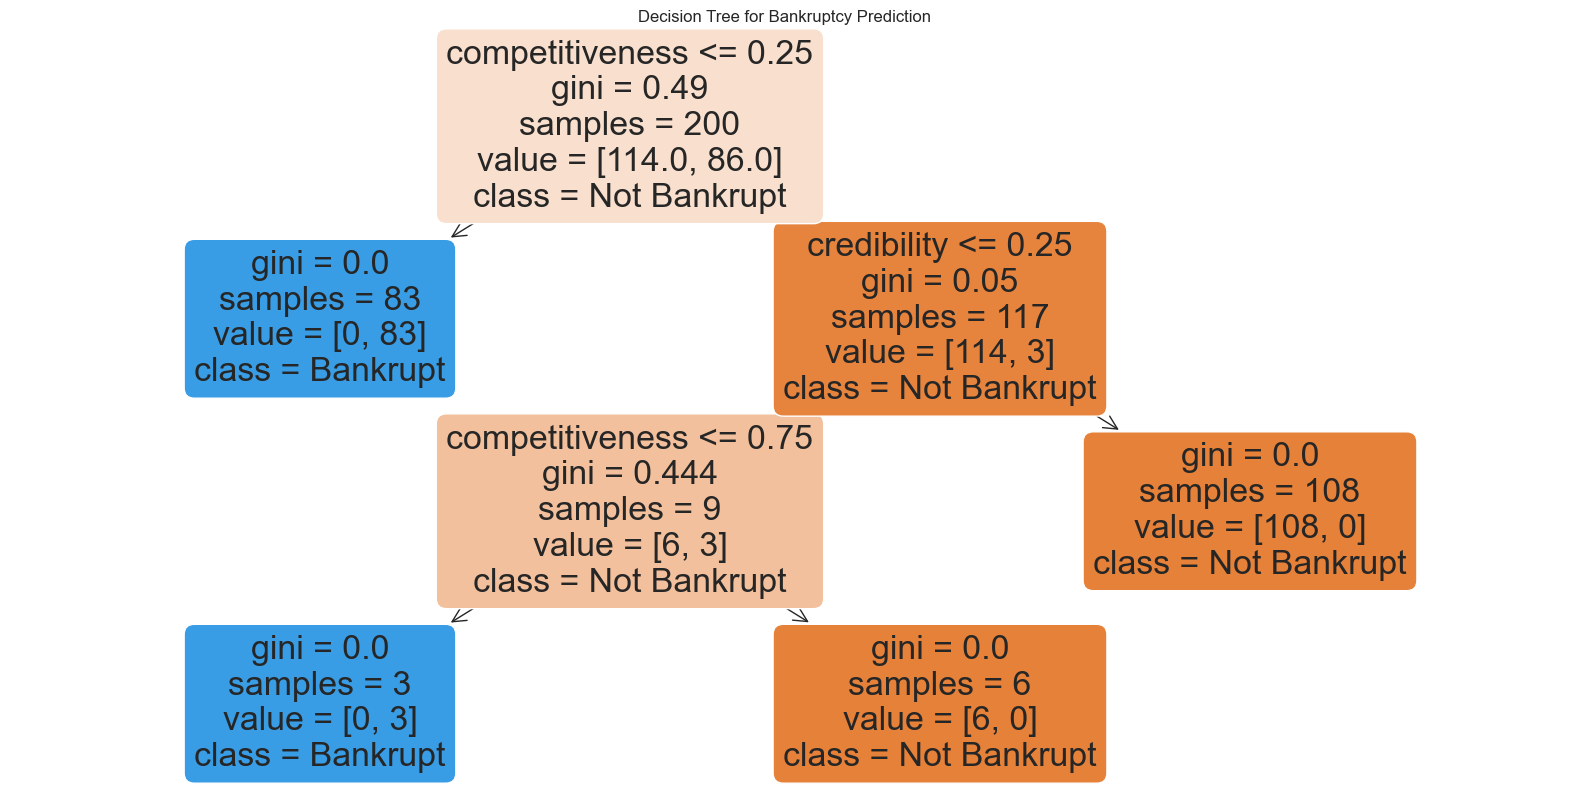

In [49]:
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Not Bankrupt','Bankrupt'],
    filled=True,
    rounded=True
)
plt.title('Decision Tree for Bankruptcy Prediction')
plt.show()

In [50]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [51]:
######  Confusion Matrix  & Classification Report  #######

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.4f}")


Confusion Matrix:
[[28  1]
 [ 0 21]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Accuracy: 98.00%
AUC Score: 0.9828


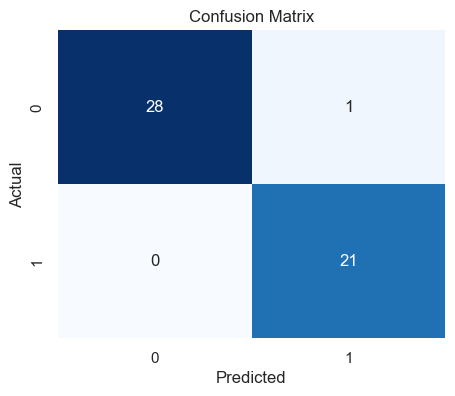

In [52]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


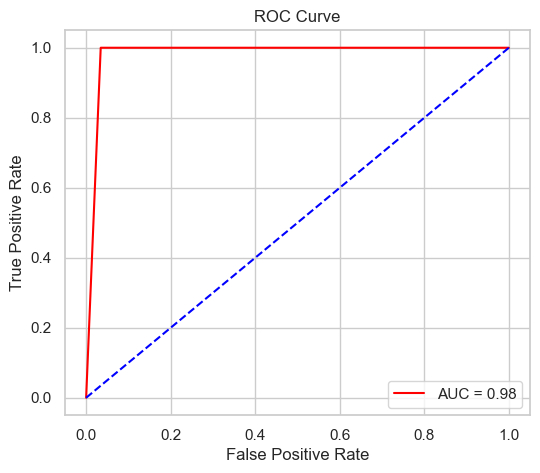

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='Red')
plt.plot([0, 1], [0, 1], linestyle='--', color='Blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [54]:
#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#>#

In [55]:
>>>>>>>>>>>>>>  Random Forest    >>>>>>>>>>>>>>>>>>>>>>>>

SyntaxError: invalid syntax (601509002.py, line 1)

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (200, 6)
Test set size: (50, 6)


In [60]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print("\nFeature Importances:")
print(importances)


Feature Importances:
competitiveness          0.485679
financial_flexibility    0.221955
credibility              0.215781
management_risk          0.036441
industrial_risk          0.026195
operating_risk           0.013949
dtype: float64


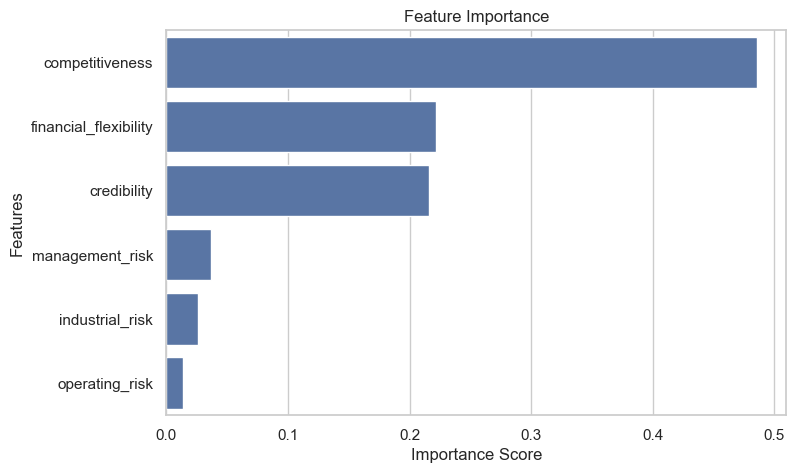

In [64]:
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [66]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [68]:
print("\nConfusion Matrix:")           ########## confusion Matrix ##########
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[29  0]
 [ 0 21]]


In [70]:
print("\nClassification Report:")   ########### Classification Report #########
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [72]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 100.00%


In [74]:
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.4f}")

AUC Score: 1.0000


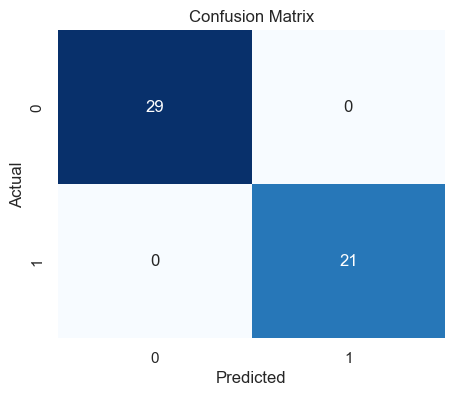

In [76]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

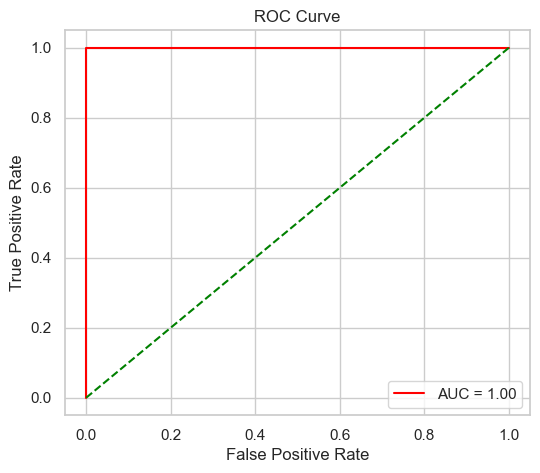

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='Red')
plt.plot([0, 1], [0, 1], linestyle='--', color='Green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
>>>>>>>>>>>>>>>>>>>>>>   Naive_Bayes   >>>>>>>>>>>>>>>>>>>>>>>>>>   

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [96]:
# Load the DataSet  

df= pd.read_csv("Copy of bankruptcy-prevention.csv",sep=';')



# Preview the data
print(df.head())
df[' class'] = df[' class'].map({'non-bankruptcy': 0, 'bankruptcy': 1})

   industrial_risk   management_risk   financial_flexibility   credibility  \
0              0.5               1.0                     0.0           0.0   
1              0.0               1.0                     0.0           0.0   
2              1.0               0.0                     0.0           0.0   
3              0.5               0.0                     0.0           0.5   
4              1.0               1.0                     0.0           0.0   

    competitiveness   operating_risk       class  
0               0.0              0.5  bankruptcy  
1               0.0              1.0  bankruptcy  
2               0.0              1.0  bankruptcy  
3               0.0              1.0  bankruptcy  
4               0.0              1.0  bankruptcy  


In [104]:
X = df.drop(' class', axis=1)
y = df[' class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [106]:
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.98
Confusion Matrix:
 [[29  0]
 [ 1 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.95      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



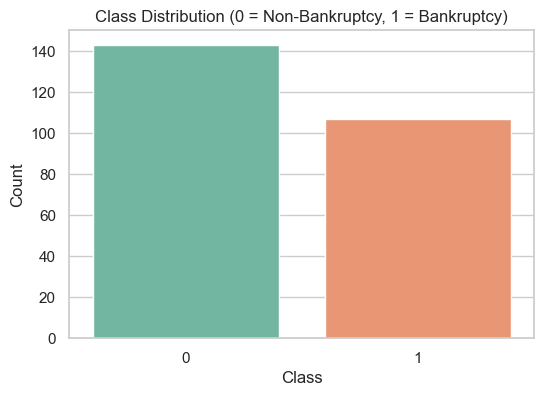

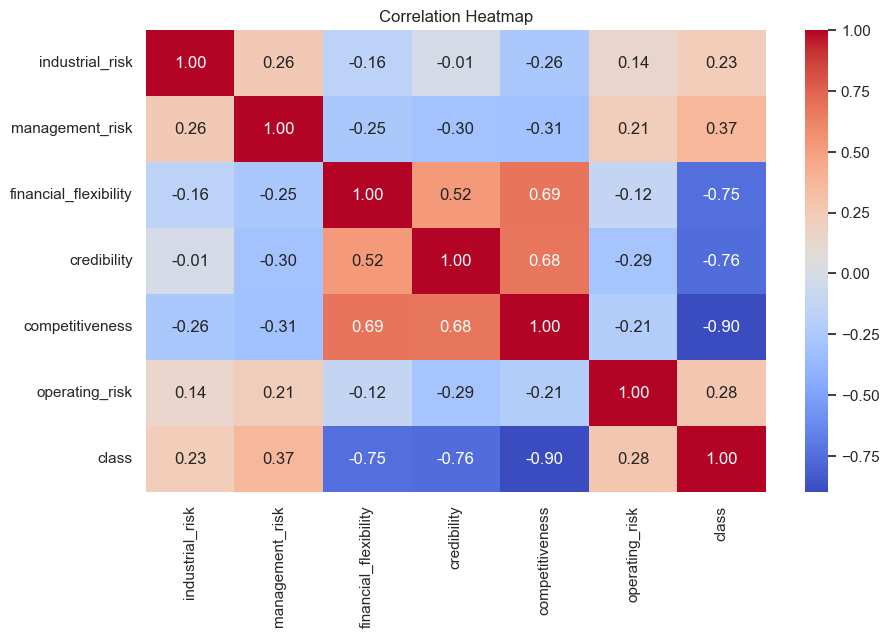

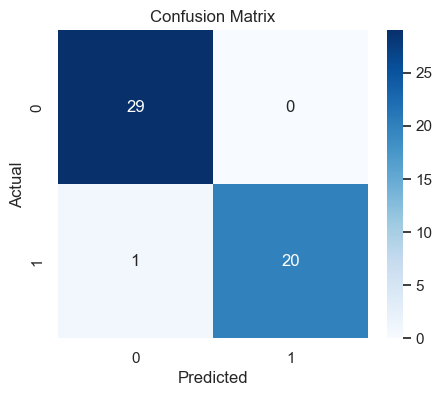

✅ Accuracy: 0.98

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.95      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



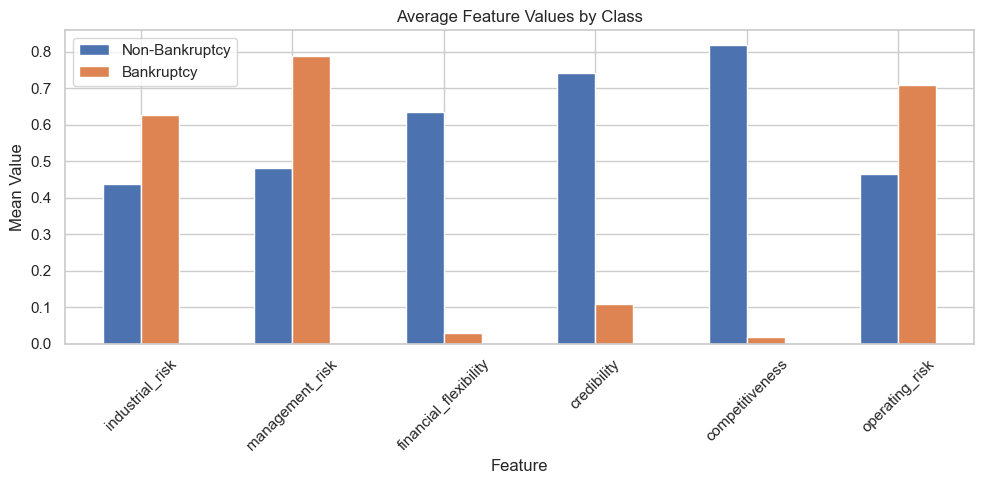

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### LOad & Process the data
# ---------------------------

df= pd.read_csv("Copy of bankruptcy-prevention.csv",sep=';')
df.columns = df.columns.str.strip()


### convert target labels into binary
df['class'] = df['class'].map({'non-bankruptcy': 0, 'bankruptcy': 1})

# -----------------------------
# 2. Class Distribution Plot
# -----------------------------
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='Set2', hue='class', legend=False)
plt.title("Class Distribution (0 = Non-Bankruptcy, 1 = Bankruptcy)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# -----------------------------
# 3. Correlation Heatmap
# -----------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# 4. Train/Test Split
# -----------------------------
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 5. Train Naive Bayes Model
# -----------------------------
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# -----------------------------
# 6. Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# 7. Evaluation Report
# -----------------------------
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# 8. Optional: Average Feature Values per Class
# -----------------------------
means = df.groupby('class').mean().T
means.plot(kind='bar', figsize=(10, 5))
plt.title("Average Feature Values by Class")
plt.ylabel("Mean Value")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.legend(["Non-Bankruptcy", "Bankruptcy"])
plt.tight_layout()
plt.show()
